<a href="https://colab.research.google.com/github/ikedoebber/Previsoes-para-Departamento-de-Marketing/blob/main/Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Fonte dos dados:* https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv')

In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [9]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


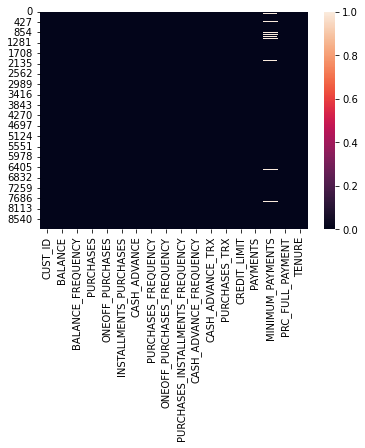

In [10]:
sns.heatmap(creditcard_df.isnull());

In [11]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [13]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [14]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [15]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [16]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

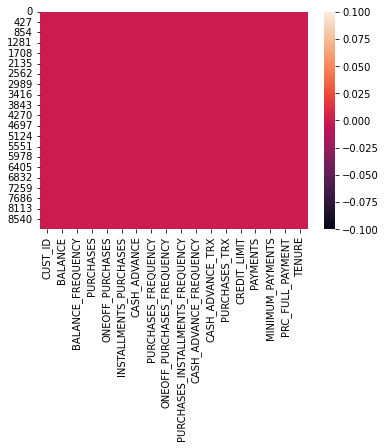

In [17]:
sns.heatmap(creditcard_df.isnull());

In [18]:
creditcard_df.duplicated().sum()

0

In [19]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [20]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [22]:
len(creditcard_df.columns)

17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

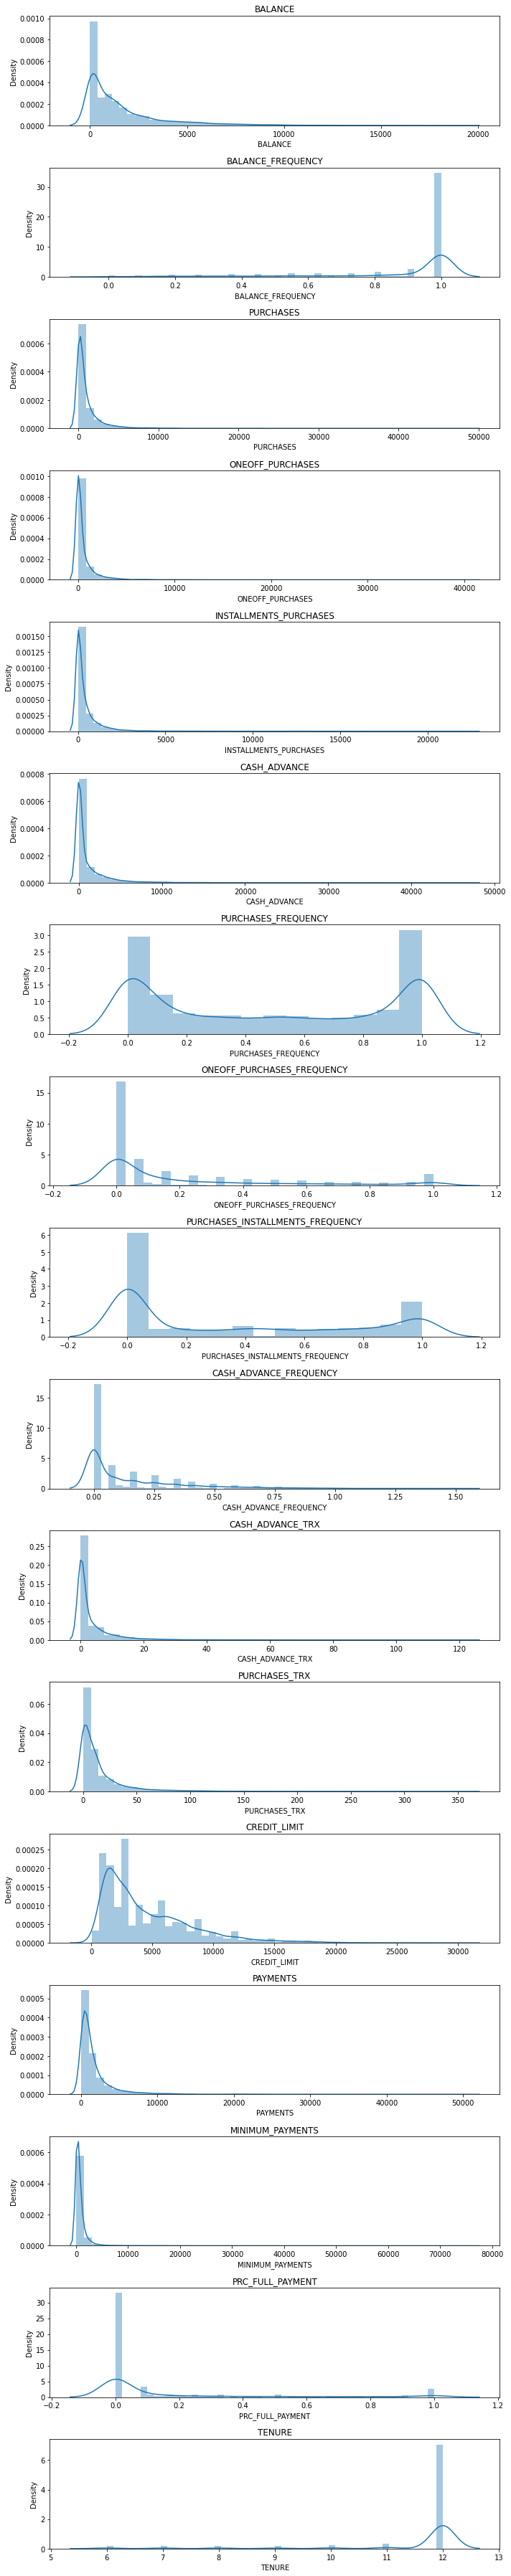

In [23]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [24]:
correlations = creditcard_df.corr()

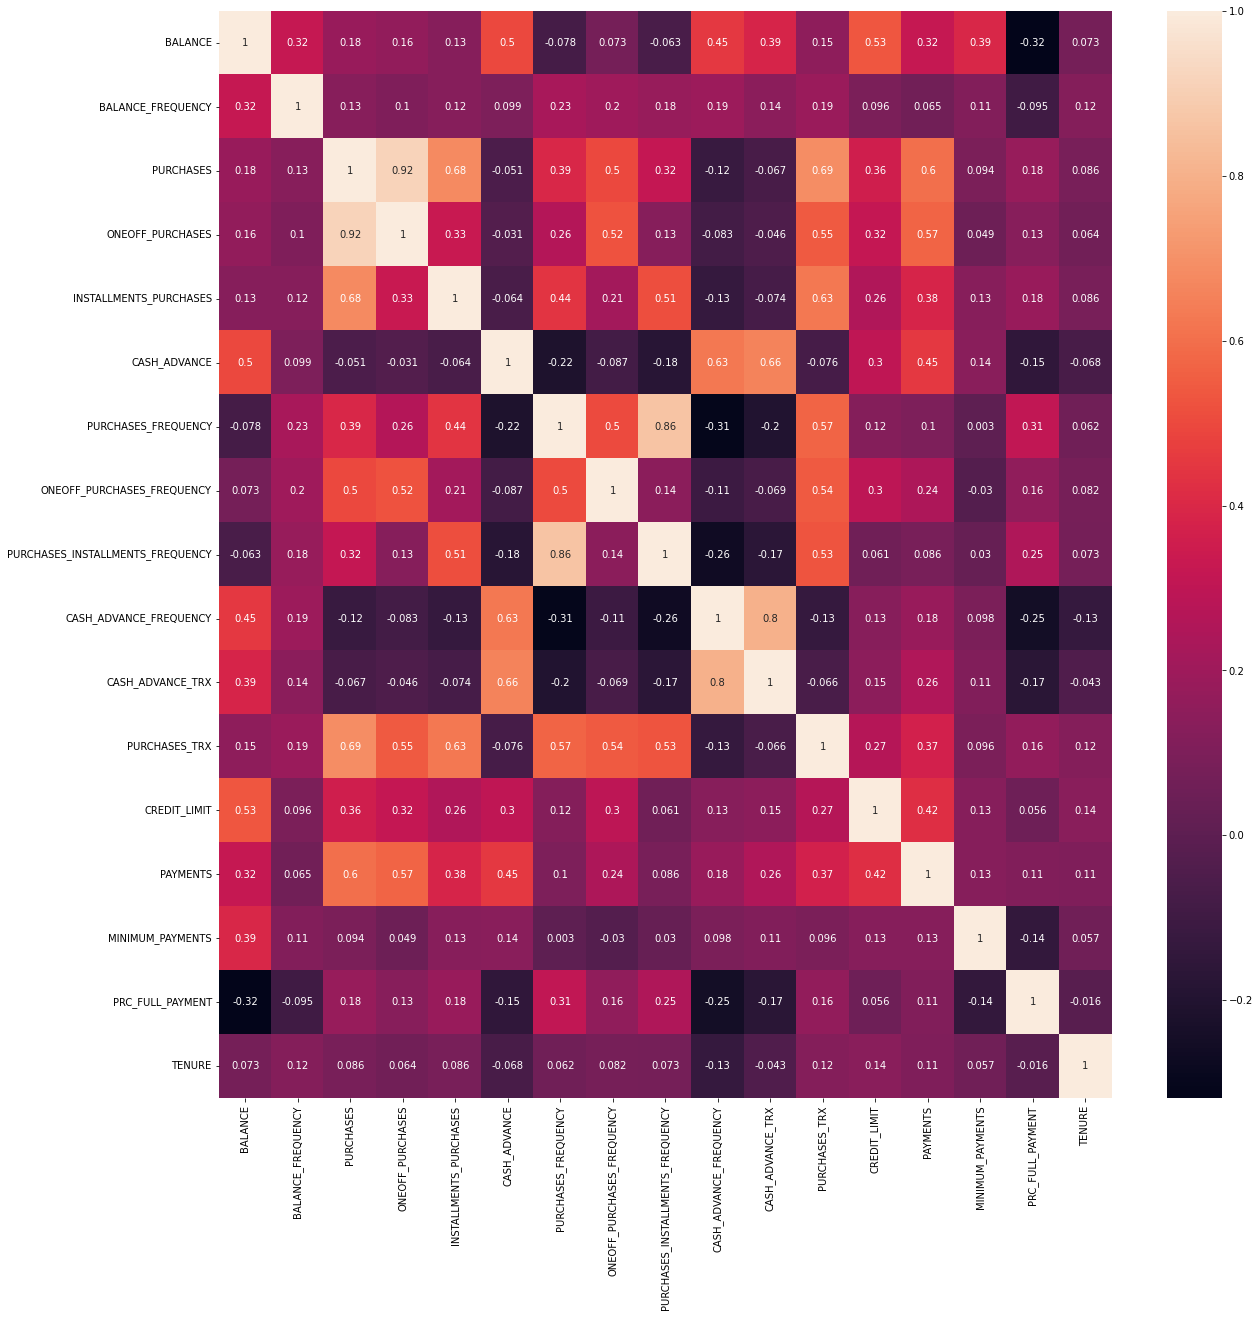

In [25]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

# **Elbow Method**

In [71]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [72]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [73]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [74]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [75]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [76]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [77]:
print(wcss_1)

[152149.99999999983, 127785.00994626769, 111986.37172444863, 99073.93826774803, 91503.38707691272, 84850.26130409811, 79527.52787465532, 74624.44205036043, 71385.94105897879, 66461.9788578816, 63664.34703749827, 61362.932325024536, 59174.44977604796, 57458.19184322965, 55910.818451278545, 54528.3366694908, 53289.503968059624, 52022.953715380456, 50670.08670941982]


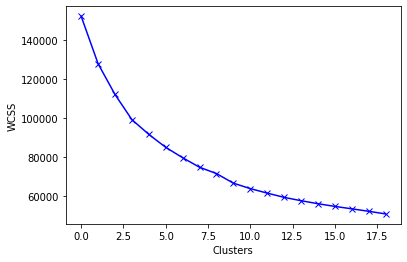

In [78]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

# **Agrupamento com KMeans**

In [79]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [80]:
labels, len(labels)

(array([1, 3, 0, ..., 5, 5, 5], dtype=int32), 8950)

In [81]:
np.unique(labels, return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1123, 2767, 2016,  880,  330,  626, 1185,   23]))

In [82]:
kmeans.cluster_centers_

array([[-1.18892000e-01,  4.03177227e-01,  5.63359691e-01,
         6.83577842e-01,  7.60015633e-02, -3.31953036e-01,
         9.97144746e-01,  1.91386854e+00,  2.12454959e-01,
        -4.15090009e-01, -3.31882650e-01,  6.58778199e-01,
         4.58612594e-01,  1.62036654e-01, -1.54478923e-01,
         4.53929887e-01,  2.72847099e-01],
       [ 7.97352123e-03,  4.04717449e-01, -3.54603670e-01,
        -2.39341596e-01, -3.98633701e-01, -9.91051894e-02,
        -8.42647866e-01, -3.85280025e-01, -7.51011125e-01,
         9.48666183e-02, -3.42378125e-02, -4.78284542e-01,
        -3.05645062e-01, -2.51969696e-01, -1.32387362e-02,
        -4.54917393e-01,  2.74532114e-01],
       [-3.58066748e-01,  3.32433084e-01, -2.95233282e-02,
        -2.40735009e-01,  3.72267273e-01, -3.62520244e-01,
         9.97180199e-01, -3.81258869e-01,  1.20881402e+00,
        -4.71902654e-01, -3.59553411e-01,  1.95129411e-01,
        -2.56957254e-01, -2.13061687e-01, -2.97766650e-02,
         3.14763023e-01,  2.5

In [83]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.118892,0.403177,0.563360,0.683578,0.076002,-0.331953,0.997145,1.913869,0.212455,-0.415090,-0.331883,0.658778,0.458613,0.162037,-0.154479,0.453930,0.272847
1,0.007974,0.404717,-0.354604,-0.239342,-0.398634,-0.099105,-0.842648,-0.385280,-0.751011,0.094867,-0.034238,-0.478285,-0.305645,-0.251970,-0.013239,-0.454917,0.274532
2,-0.358067,0.332433,-0.029523,-0.240735,0.372267,-0.362520,0.997180,-0.381259,1.208814,-0.471903,-0.359553,0.195129,-0.256957,-0.213062,-0.029777,0.314763,0.256155
3,1.672951,0.390531,-0.221331,-0.157770,-0.233551,1.999737,-0.481568,-0.213481,-0.421808,1.909869,1.916129,-0.271317,1.015488,0.814604,0.548358,-0.391211,0.071124
4,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
5,-0.334901,-0.349885,-0.287298,-0.212974,-0.287679,0.068020,-0.203948,-0.284236,-0.227466,0.307808,-0.000179,-0.387812,-0.562209,-0.391666,-0.208921,0.012748,-3.197669
6,-0.700916,-2.135919,-0.309790,-0.234351,-0.301835,-0.322887,-0.552623,-0.440210,-0.438526,-0.522023,-0.376648,-0.418105,-0.175016,-0.201945,-0.257046,0.284044,0.201773
7,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


In [88]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1317.011166,0.972780,2206.831496,1727.036581,479.794915,282.750088,0.890553,0.773402,0.448872,0.052080,0.983972,31.084595,6163.069700,2202.224090,504.199929,0.286481,11.882458
1,1581.071039,0.973145,245.588627,195.179342,50.588135,771.042901,0.152155,0.087521,0.065966,0.154128,3.015179,2.821467,3382.387664,1003.716271,833.354226,0.020659,11.884713
2,819.189116,0.956021,940.127788,192.866563,747.704320,218.649226,0.890567,0.088721,0.844851,0.040712,0.795139,19.560020,3559.533830,1116.351146,794.813281,0.245777,11.860119
3,5046.581251,0.969784,530.327170,330.572295,199.870409,5172.413840,0.297074,0.138772,0.196800,0.517329,16.325000,7.965909,8189.209711,4091.341643,2142.131757,0.039292,11.612500
4,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
5,867.405752,0.794386,389.387444,238.943722,150.922955,1121.512020,0.408496,0.117664,0.274036,0.196740,3.247604,5.070288,2448.904871,599.308188,377.324957,0.157443,7.238019
6,105.576699,0.371291,341.333789,203.462143,138.122110,301.761115,0.268556,0.071134,0.190156,0.030682,0.678481,4.317300,3857.670417,1148.533664,265.172405,0.236793,11.787342
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


In [89]:
labels, len(labels)

(array([1, 3, 0, ..., 5, 5, 5], dtype=int32), 8950)

In [90]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


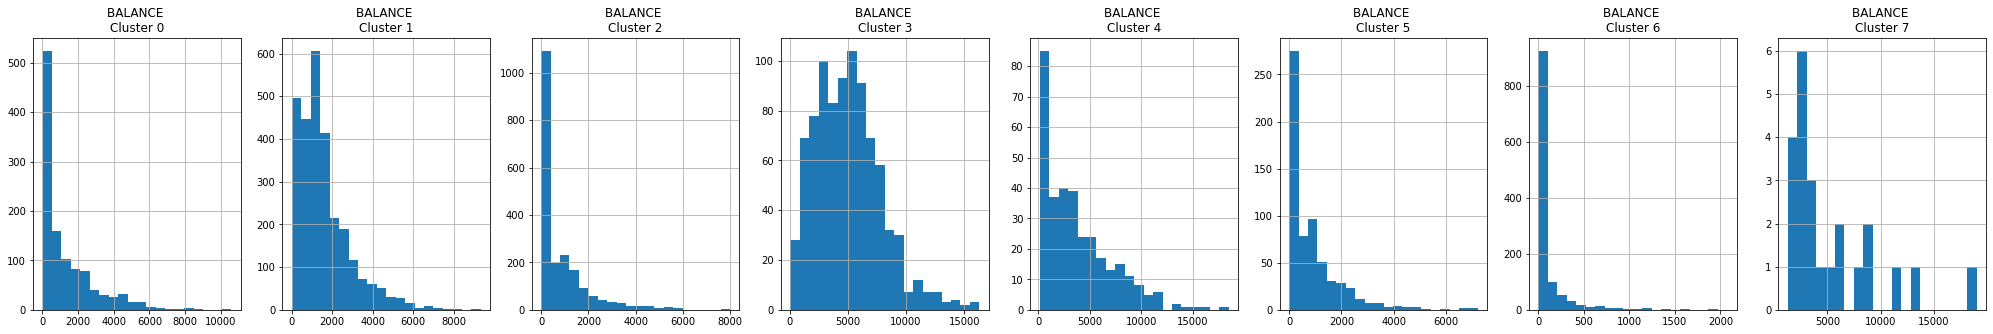

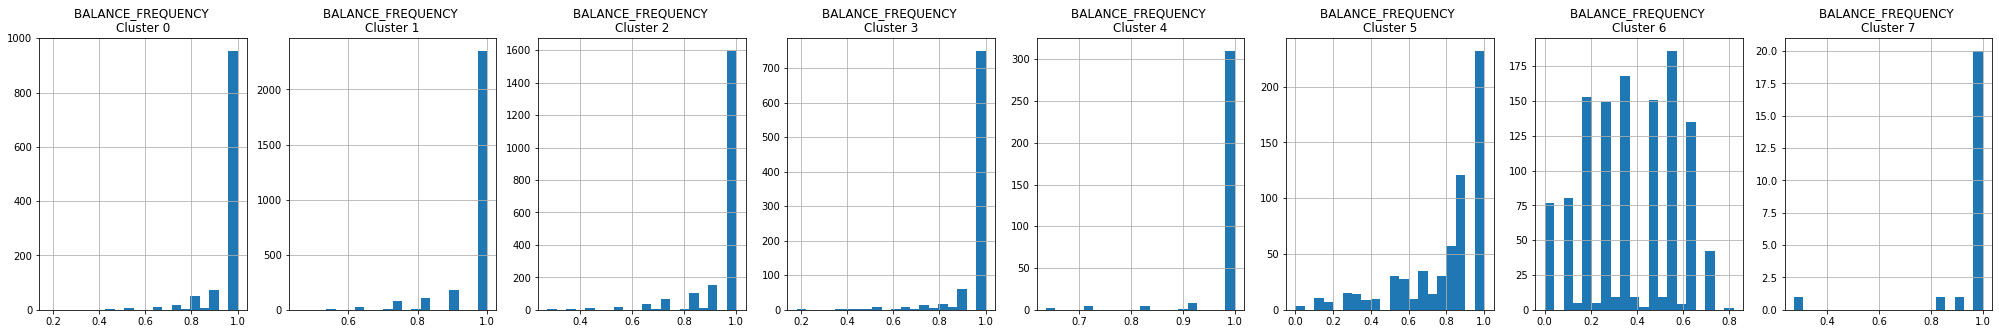

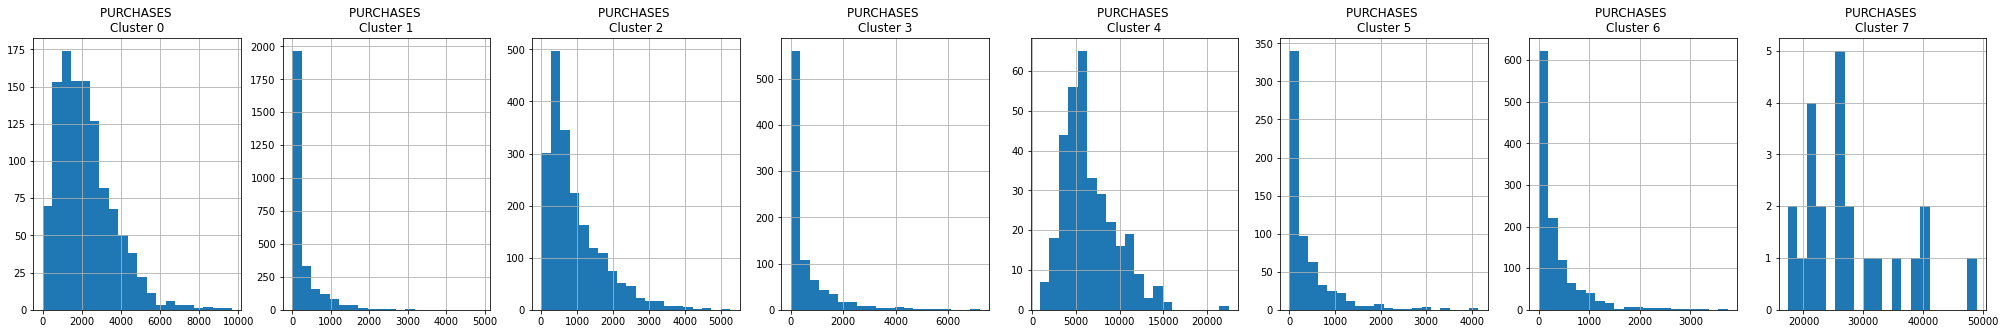

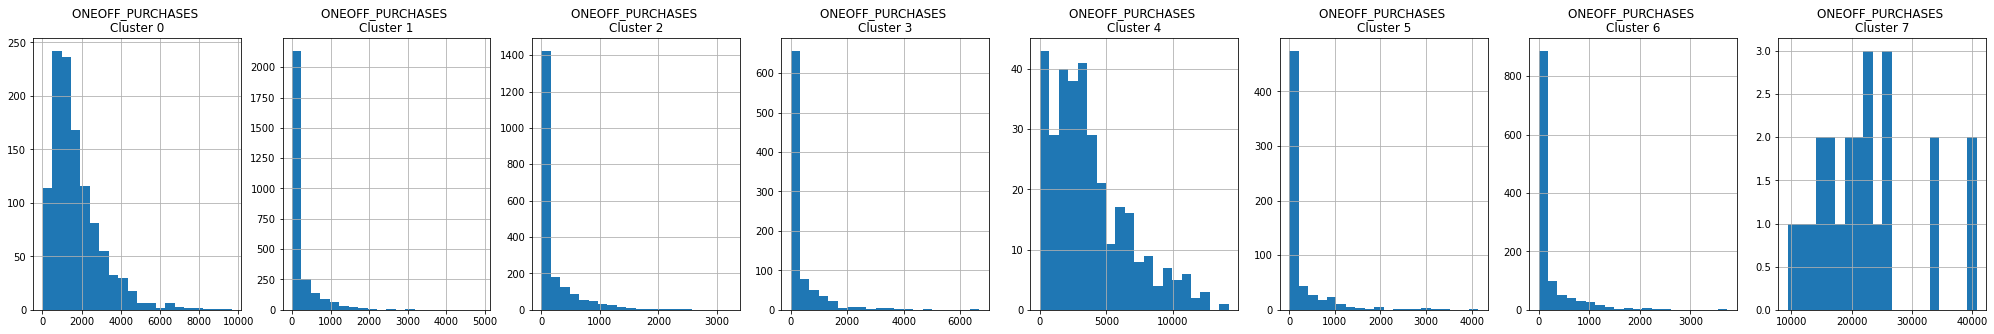

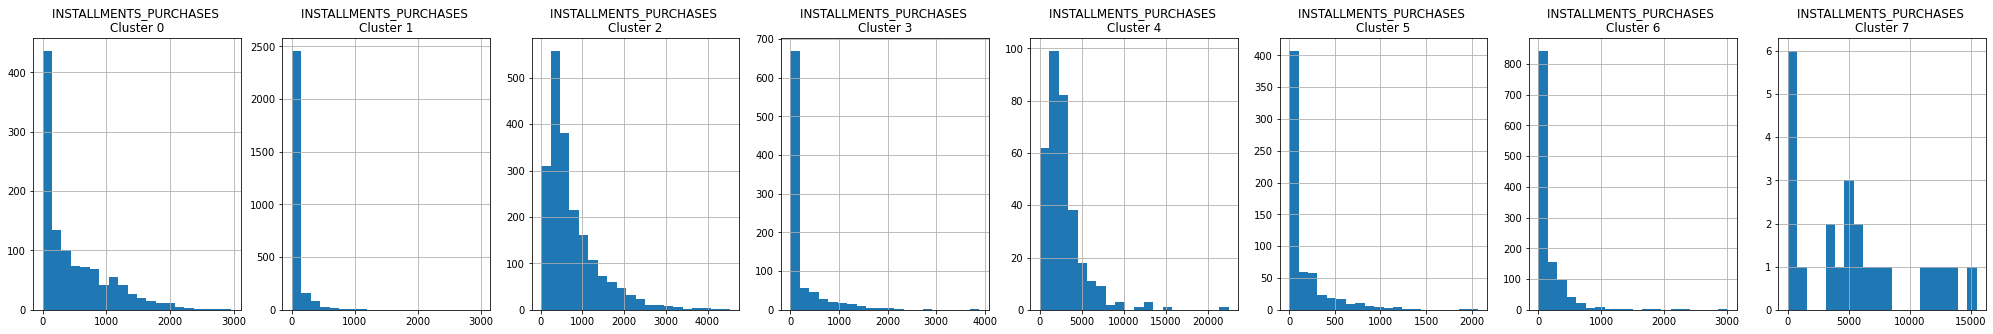

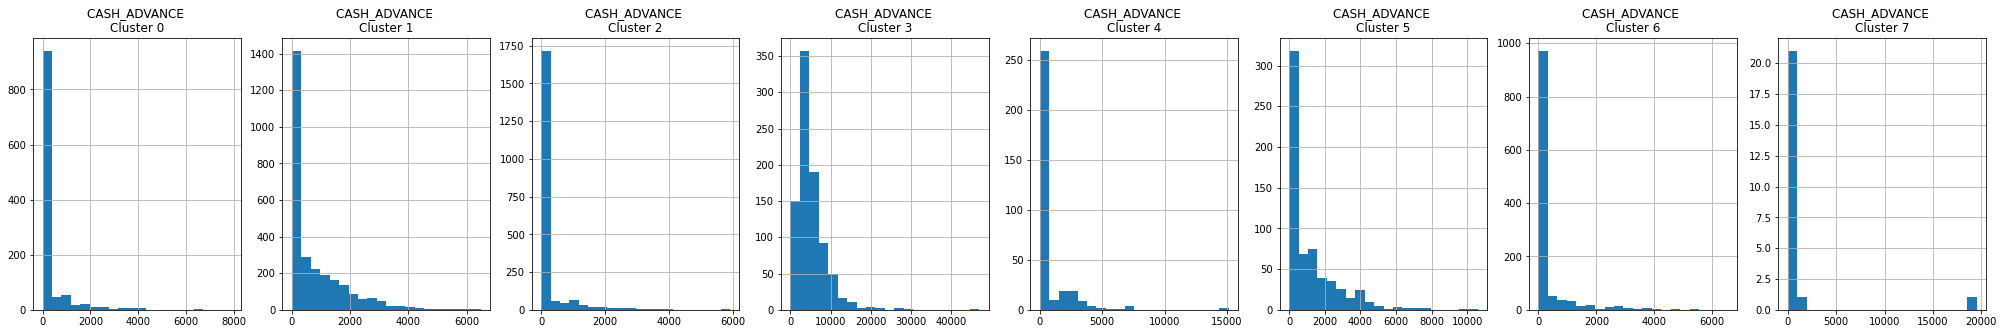

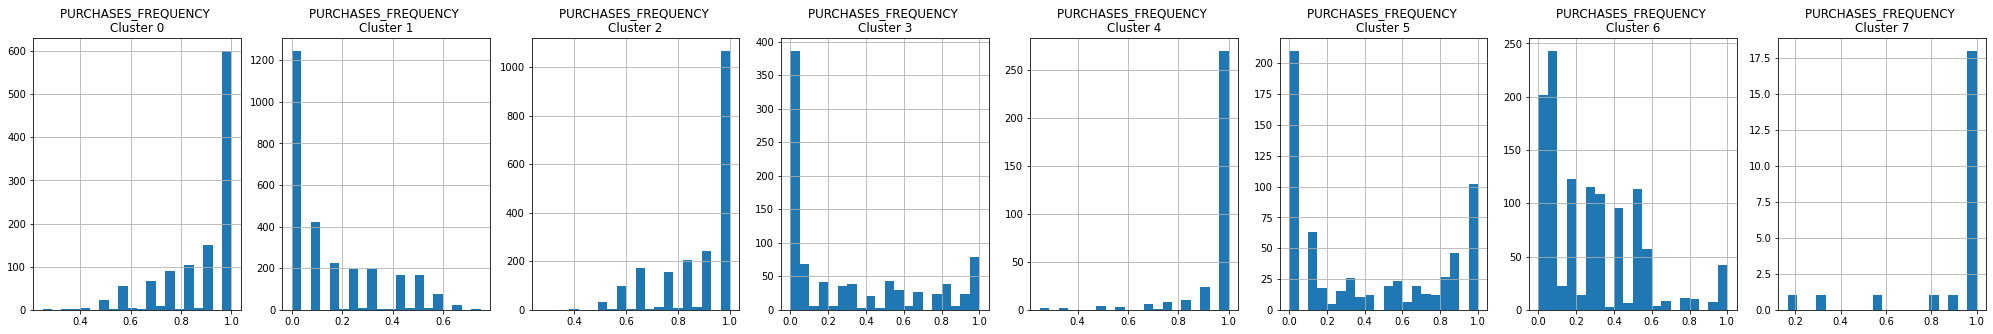

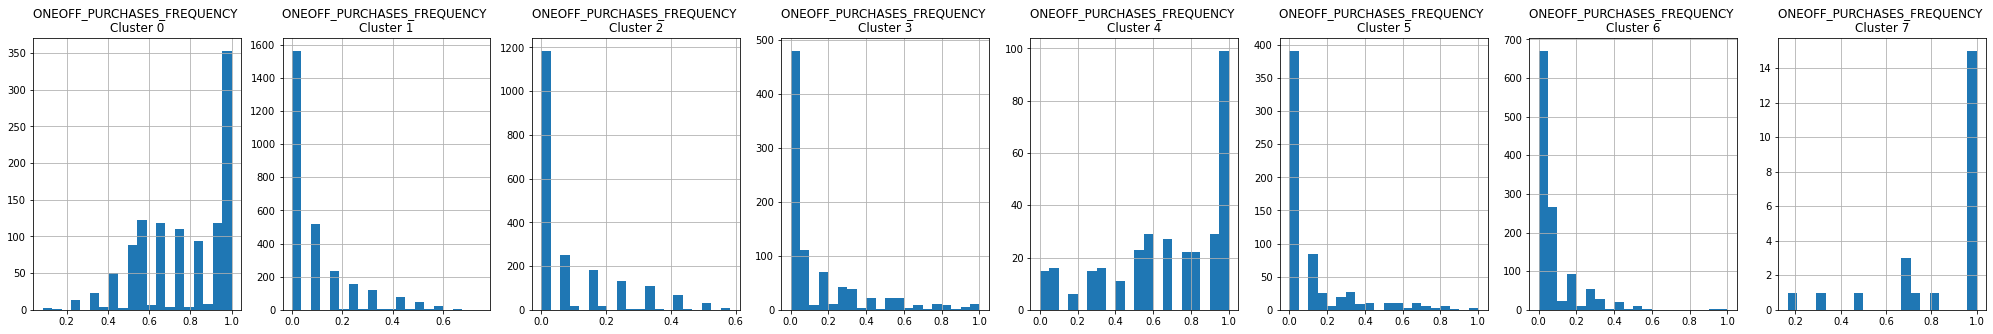

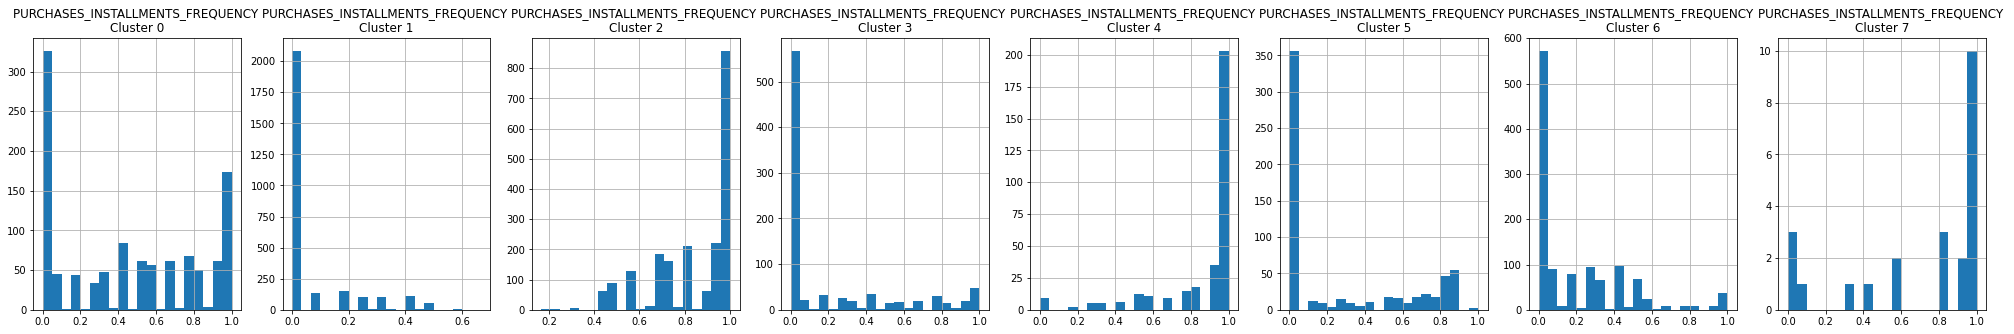

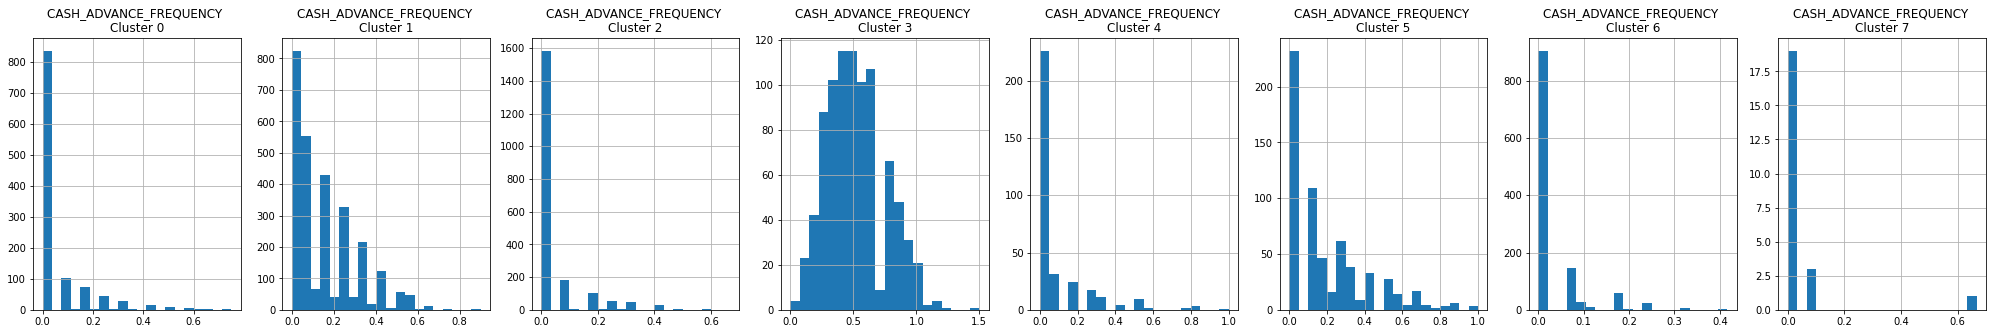

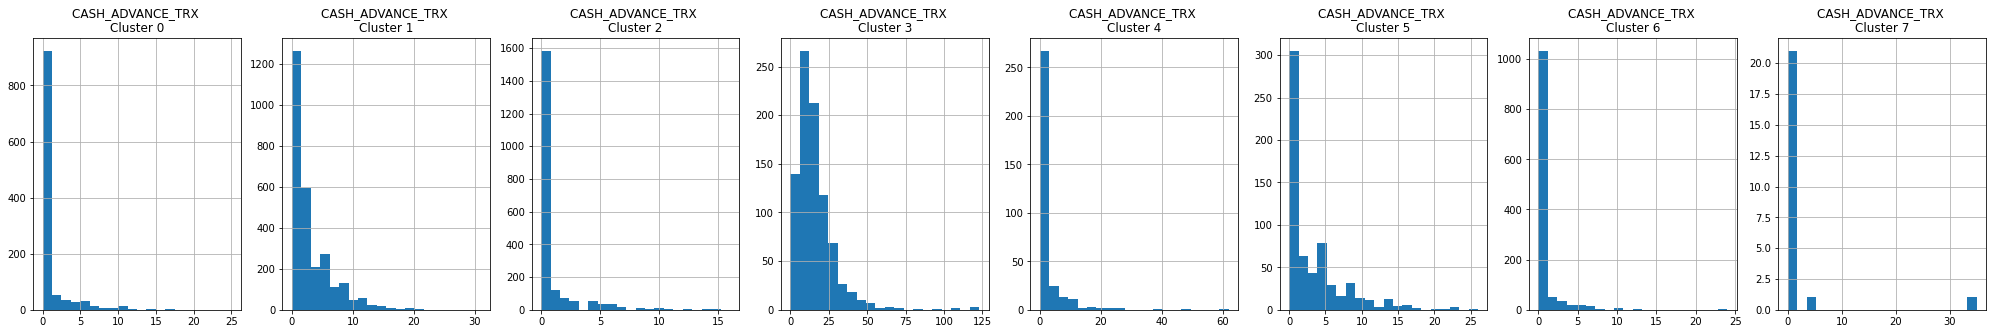

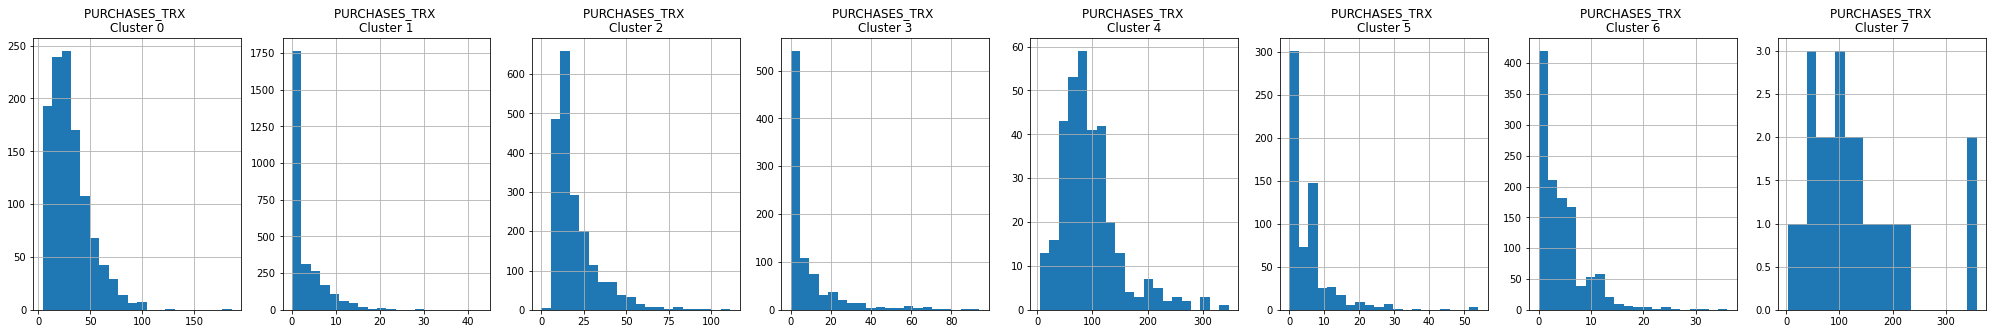

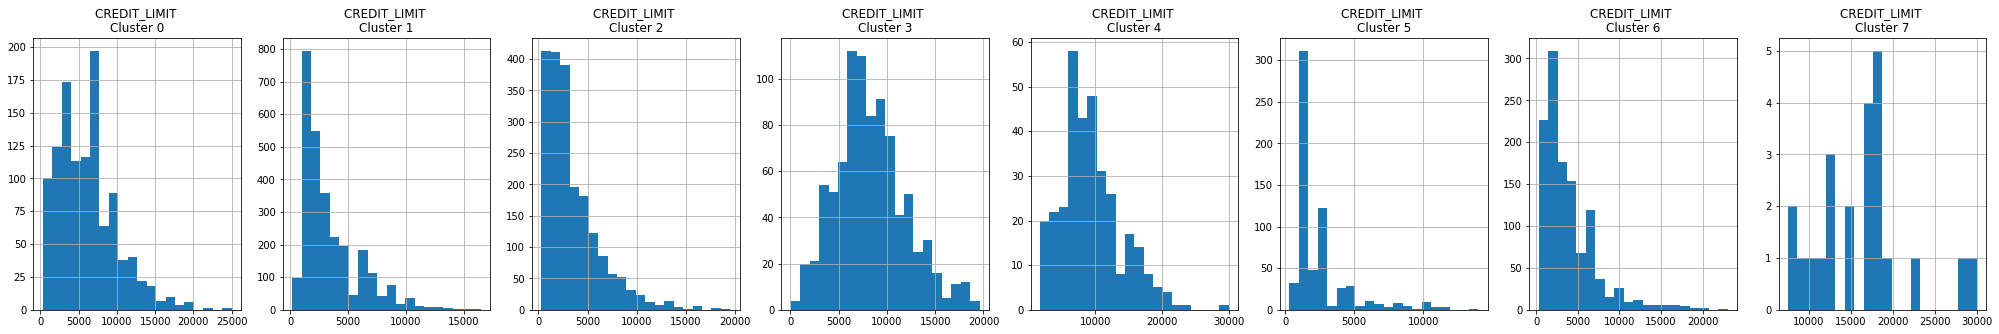

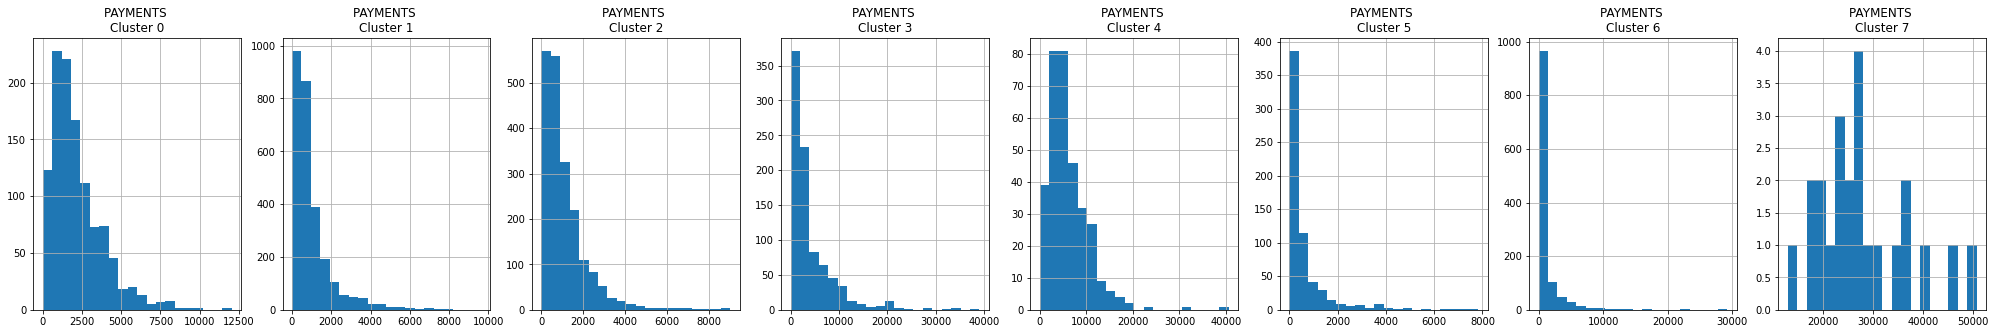

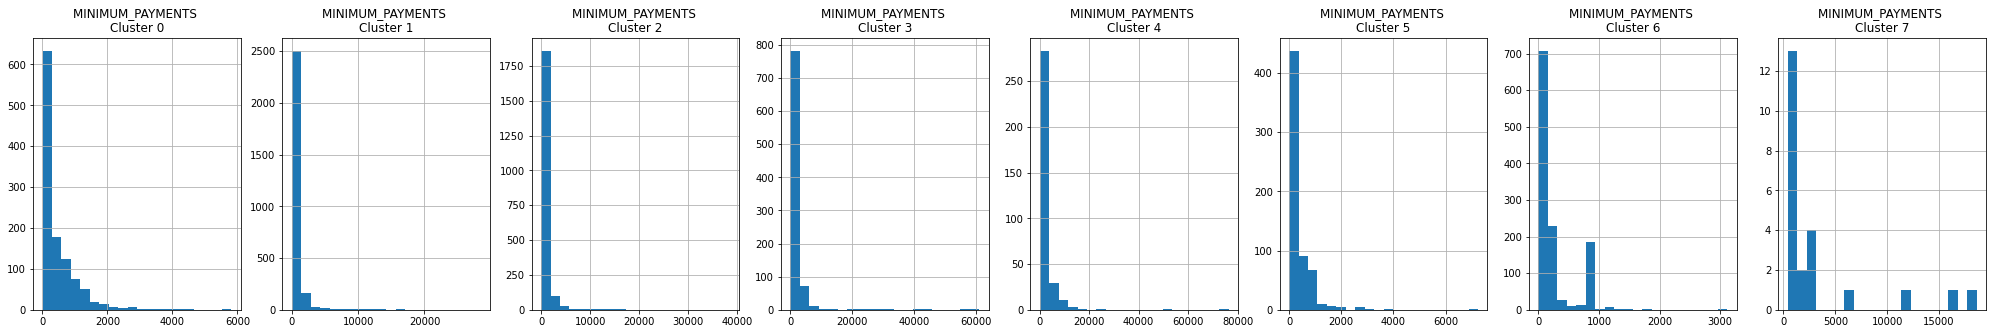

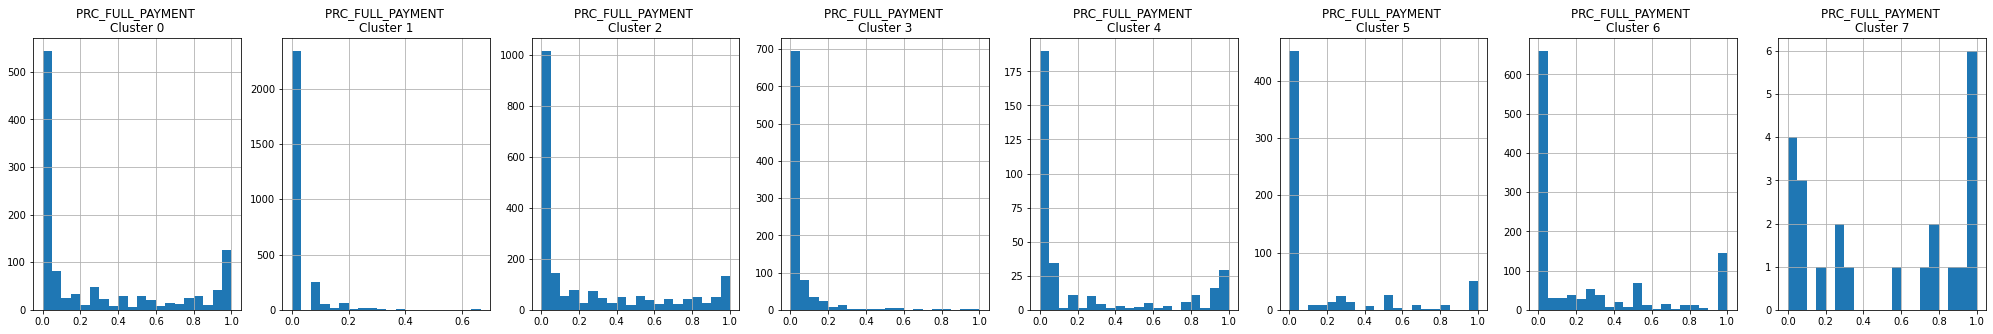

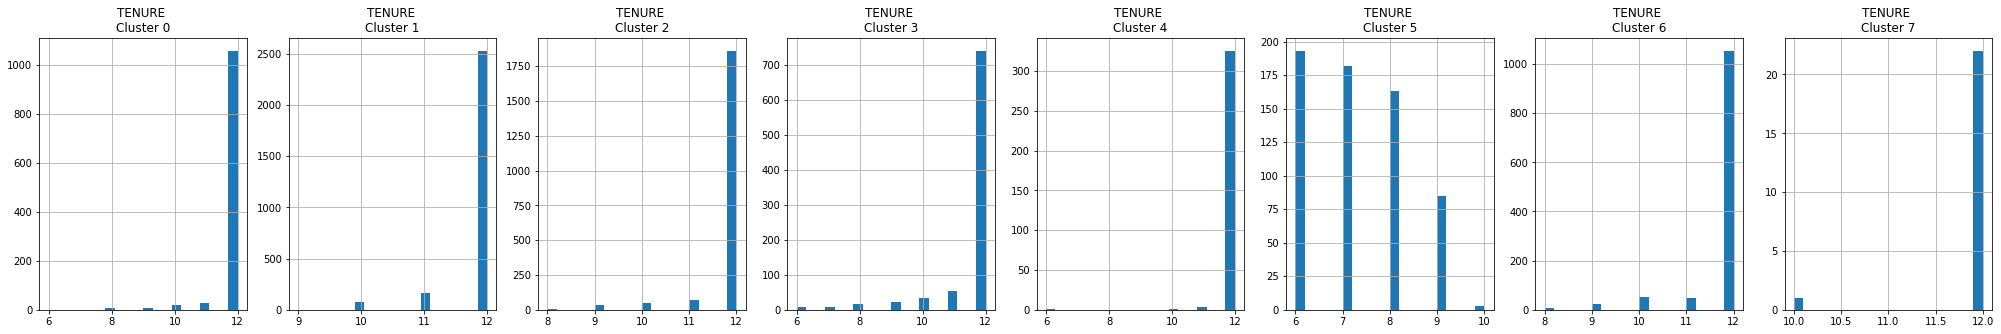

In [91]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [92]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2975,1611.720259,1.0,955.59,873.85,81.74,0.000000,0.916667,0.916667,0.083333,0.000000,0,19,5000.0,703.220116,457.013405,0.000000,12,0
2232,4677.021295,1.0,1798.66,1364.22,434.44,1569.577102,0.916667,0.583333,0.916667,0.416667,6,36,9000.0,1156.783897,1615.317615,0.000000,12,0
6296,4548.940782,1.0,2095.49,1349.33,746.16,826.710558,1.000000,0.833333,1.000000,0.166667,3,72,6500.0,1427.071161,1036.041514,0.000000,12,0
6297,157.364234,1.0,1778.92,1233.87,545.05,0.000000,1.000000,1.000000,0.500000,0.000000,0,36,10500.0,1686.269252,143.010184,0.777778,12,0
1098,3676.070324,1.0,2255.10,1216.81,1038.29,106.449005,1.000000,0.666667,1.000000,0.083333,1,27,3500.0,2055.087209,3606.228152,0.000000,12,0


In [93]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1604,3391.702180,1.0,38902.71,33803.84,5098.87,0.0,1.0,1.00,1.0,0.0,0,195,18000.0,35843.62593,716.027656,1.000000,12,7
970,3108.393701,0.9,26582.34,15158.90,11423.44,0.0,0.9,0.80,0.8,0.0,0,55,28000.0,26557.09724,586.029097,0.875000,10,7
1190,1893.611922,1.0,22746.81,15795.42,6951.39,0.0,1.0,1.00,1.0,0.0,0,140,18000.0,22558.28457,505.125031,1.000000,12,7
941,2072.457624,1.0,17409.21,11263.17,6146.04,0.0,1.0,1.00,1.0,0.0,0,175,19500.0,19517.16160,517.324081,0.333333,12,7
138,19043.138560,1.0,22009.92,9449.07,12560.85,0.0,1.0,0.75,1.0,0.0,0,216,18000.0,23018.57583,18621.013310,0.000000,12,7


In [94]:
credit_ordered.to_csv('cluster.csv')

# **Aplicação PCA e visualização dos resultados**

In [95]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222162, -1.07644759],
       [-1.13829376,  2.50647054],
       [ 0.96967551, -0.38351328],
       ...,
       [-0.92620518, -1.81077954],
       [-2.33654849, -0.65796517],
       [-0.5564179 , -0.4004755 ]])

In [96]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682222,-1.076448
1,-1.138294,2.506471
2,0.969676,-0.383513
3,-0.873630,0.043172
4,-1.599435,-0.688579


In [97]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682222,-1.076448,1
1,-1.138294,2.506471,3
2,0.969676,-0.383513,0
3,-0.873630,0.043172,1
4,-1.599435,-0.688579,1


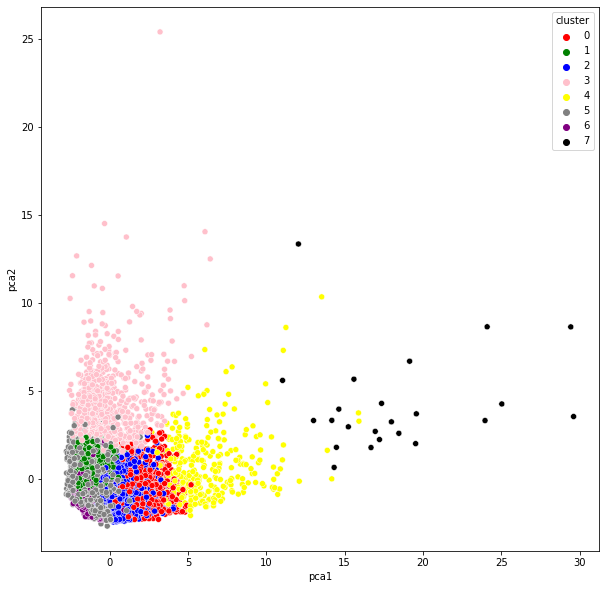

In [98]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

# **AutoEncoders**

In [99]:
# 18 -> 10
# Elbow
# K-means
# PCA

In [100]:
creditcard_df_scaled.shape

(8950, 17)

In [101]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [102]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [103]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [104]:
# encoder
encoder = Model(input_df, encoded)

In [105]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [106]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 8s 27ms/step - loss: 0.2236
Epoch 2/50
280/280 [==============================] - 6s 23ms/step - loss: 0.1074
Epoch 3/50
280/280 [==============================] - 10s 36ms/step - loss: 0.0769
Epoch 4/50
280/280 [==============================] - 12s 42ms/step - loss: 0.0797
Epoch 5/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0515
Epoch 6/50
280/280 [==============================] - 8s 27ms/step - loss: 0.0707
Epoch 7/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0862
Epoch 8/50
280/280 [==============================] - 10s 37ms/step - loss: 0.0552
Epoch 9/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0561
Epoch 10/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0372
Epoch 11/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0491
Epoch 12/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0346
Epoch 13/5

In [107]:
creditcard_df_scaled.shape

(8950, 17)

In [108]:
compact = encoder.predict(creditcard_df_scaled)

In [109]:
compact.shape

(8950, 10)

In [110]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [111]:
compact[0]

array([0.        , 0.        , 0.21207967, 0.        , 1.1289583 ,
       0.7617984 , 0.3432495 , 0.21773627, 0.        , 0.64604604],
      dtype=float32)

In [112]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

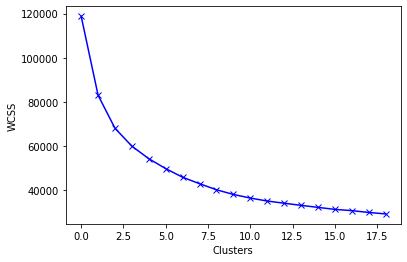

In [113]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

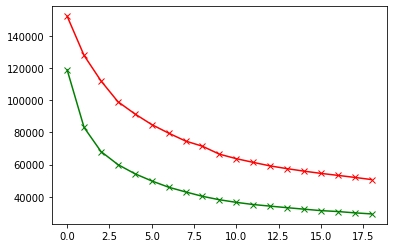

In [114]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [115]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [116]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 2, 2, ..., 2, 2, 2], dtype=int32), (8950,))

In [117]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [118]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-2.297291,0.049237
1,1.847639,-1.736215
2,0.843018,0.501965
3,0.278757,-0.491905
4,-2.189059,0.113899


In [119]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.297291,0.049237,1
1,1.847639,-1.736215,2
2,0.843018,0.501965,2
3,0.278757,-0.491905,2
4,-2.189059,0.113899,1


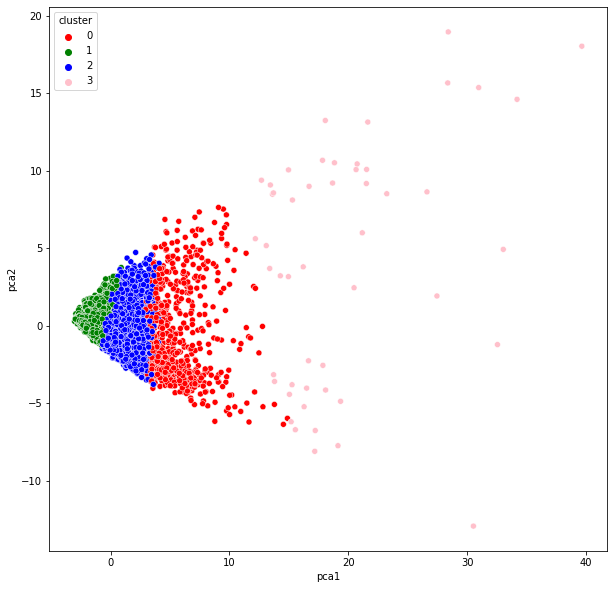

In [120]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [121]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3470,2499.228939,1.000,217.37,0.00,217.37,5197.145458,0.833333,0.000000,0.666667,0.500,3,11,10000.0,360.742975,372.143566,0.000000,6,0
2737,6187.219303,1.000,2029.03,1044.28,984.75,5933.125159,0.916667,0.416667,0.750000,0.500,13,20,15000.0,8518.845677,1591.416385,0.000000,12,0
4181,1604.476717,0.800,2619.70,2619.70,0.00,3041.406240,0.600000,0.600000,0.000000,0.300,3,10,6000.0,2045.152399,330.428974,0.142857,10,0
2728,5266.121863,1.000,9030.08,6345.65,2684.43,0.000000,0.916667,0.250000,0.833333,0.000,0,28,6000.0,7973.983573,6567.292367,0.083333,12,0
2726,2263.795064,0.875,320.00,320.00,0.00,4510.237702,0.500000,0.500000,0.000000,0.875,15,5,10000.0,5215.482973,502.888727,0.000000,8,0


In [122]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3806,14100.251100,1.000000,4995.80,3403.11,1592.69,20712.670080,1.000000,1.000000,0.333333,0.833333,36,34,16500.0,20418.33238,21235.065300,0.0,12,3
645,1482.235539,1.000000,14604.87,2475.93,12128.94,0.000000,1.000000,0.583333,1.000000,0.000000,0,219,15500.0,14462.63056,340.717801,1.0,12,3
4220,1268.809031,0.272727,17945.00,17945.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,18000.0,50721.48336,1149.747342,0.0,12,3
2970,5968.583246,1.000000,22381.97,19150.02,3231.95,0.000000,1.000000,1.000000,0.583333,0.000000,0,87,14500.0,20343.28681,1966.191831,0.0,12,3
2915,268.577278,0.181818,0.00,0.00,0.00,5625.798427,0.000000,0.000000,0.000000,0.083333,1,0,9000.0,34107.07499,761.962503,1.0,12,3


In [123]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
